In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

In [3]:
train["Age"] = train["Age"].fillna(train["Age"].median())

In [4]:
# hyper parameter 
learning_rate = 0.000002
iteration = 20000

In [5]:
# math equation
def sigmoid(x):
    expo_add_one = np.exp(-x) + 1
    return 1.0 / expo_add_one

In [6]:
train.loc[train["Embarked"] == 'S', "Embarked"] = 0
train.loc[train["Embarked"] == 'C', "Embarked"] = 1
train.loc[train["Embarked"] == 'Q', "Embarked"] = 2
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

train.loc[train["Sex"] == 'male', "Sex"] = 0
train.loc[train["Sex"] == 'female', "Sex"] = 1
train["Sex"] = train["Sex"].fillna(train["Sex"].mode()[0])

In [7]:
# normalize data (by using (data - mean)/std )
SELECTED_FEATURES = ['Pclass', 'Sex', 'Age', 'Embarked']
# for feature in SELECTED_FEATURES:
#     train_mean = train[feature].mean()
#     train_std = train[feature].std()
#     train[feature] -= train_mean
#     train[feature] /= train_std
        
data = np.array(train[["Pclass", "Sex", "Age", "Embarked"]].values, dtype=np.float)
data_list = list(data)
data.shape

(891, 4)

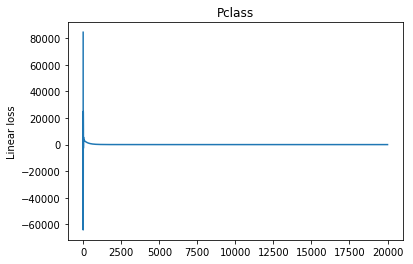

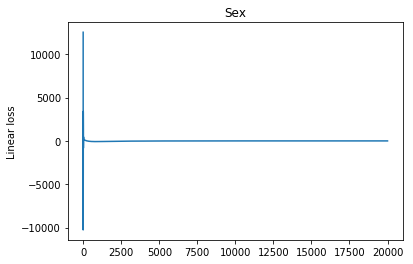

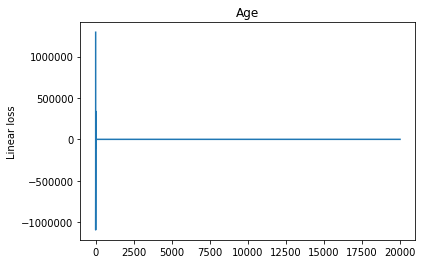

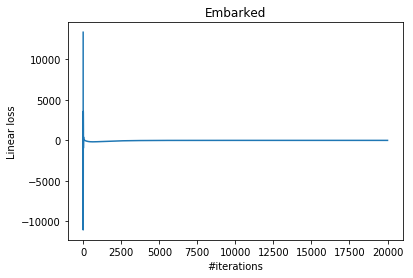

In [8]:
# Initialize weights
mu, sigma = (0, 1)
theta = np.random.normal(mu, sigma, (1, 4))

y = np.array(train[["Survived"]].values, dtype=np.float)
y = y.reshape(1, y.shape[0])

# gradient update weights
loss_list = [[], [], [], []]
for itr in range(iteration):

    # linear regression approach
    update_weight = (y - theta.dot(data.T)).dot(data)
    # print(loss)
    
    theta += learning_rate * update_weight
    
    for i in range(len(loss_list)):
        loss_list[i].append(-update_weight[0][i])

#plot graph   
for i in range(len(loss_list)):
    axis_x = range(len(loss_list[i]))
    plt.plot(axis_x, loss_list[i])
    plt.ylabel('Linear loss')
    plt.title(SELECTED_FEATURES[i])
    if (i == 3):
        plt.xlabel('#iterations')
    plt.show()

In [9]:
def predict(theta, data):
    result = theta.dot(data.T)
    return np.where(result>0.5, 1, 0)


In [10]:
## PREPROCESS TESTING DATA
test["Age"] = test["Age"].fillna(test["Age"].median())

# Embarked
test.loc[test["Embarked"] == 'S', "Embarked"] = 0
test.loc[test["Embarked"] == 'C', "Embarked"] = 1
test.loc[test["Embarked"] == 'Q', "Embarked"] = 2
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])

# Sex
test.loc[test["Sex"] == 'male', "Sex"] = 0
test.loc[test["Sex"] == 'female', "Sex"] = 1
test["Sex"] = test["Sex"].fillna(test["Sex"].mode()[0])

In [11]:
test_data = np.array(test[["Pclass", "Sex", "Age", "Embarked"]].values, dtype=np.float)
test_data.shape
print(theta)
print(theta.shape)
print(data.T.shape)

[[-0.01411086  0.60414215  0.00501506  0.06117994]]
(1, 4)
(4, 891)


In [12]:
prediction = predict(theta, test_data)
display_prediction = prediction.astype(np.int)
num_result = prediction.shape[1]
print('Passenger,Survived')
for i in range(prediction.shape[1]):
    print(str(test["PassengerId"][i]) + "," + str(display_prediction[0][i]))
print(test["PassengerId"].shape)
print(test_data.shape)

Passenger,Survived
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,1
911,1
912,0
913,0
914,1
915,0
916,1
917,0
918,1
919,0
920,0
921,0
922,0
923,0
924,1
925,1
926,0
927,0
928,1
929,1
930,0
931,0
932,0
933,0
934,0
935,1
936,1
937,0
938,0
939,0
940,1
941,1
942,0
943,0
944,1
945,1
946,0
947,0
948,0
949,0
950,0
951,1
952,0
953,0
954,0
955,1
956,0
957,1
958,1
959,0
960,0
961,1
962,1
963,0
964,1
965,0
966,1
967,0
968,0
969,1
970,0
971,1
972,0
973,0
974,0
975,0
976,0
977,0
978,1
979,1
980,1
981,0
982,1
983,0
984,1
985,0
986,0
987,0
988,1
989,0
990,1
991,0
992,1
993,0
994,0
995,0
996,1
997,0
998,0
999,0
1000,0
1001,0
1002,0
1003,1
1004,1
1005,1
1006,1
1007,0
1008,0
1009,1
1010,0
1011,1
1012,1
1013,0
1014,1
1015,0
1016,0
1017,1
1018,0
1019,1
1020,0
1021,0
1022,0
1023,0
1024,1
1025,0
1026,0
1027,0
1028,0
1029,0
1030,1
1031,0
1032,1
1033,1
1034,0
1035,0
1036,0
1037,0
1038,0
1039,0
1040,0
1041,0
1042,1
1043,0
1044,0
1045,1
1046,0
1047

In [13]:
mse = np.square(np.sum(y - theta.dot(data.T),axis=1)) / y.shape[1] 

In [14]:
mse[0]

1.0389680475918501

In [15]:
prediction = predict(theta, test_data)
display_prediction = prediction.astype(np.int)
columns = ["PassengerId", "Survived"]
ls = []
for i in range(prediction.shape[1]):
    ls.append([test["PassengerId"][i], display_prediction[0][i]])
ls = np.array(ls)
df = pd.DataFrame(ls, columns=columns)
df.to_csv('linear_regression_with_sigmoid.csv', index=False)